In [1]:
# module
import math as m
import pandas as pd

In [2]:
tracking_mode = 2
# Concentrator
W = 1.25 # m --> Aperture
l = 3.657 # m --> Length
# Absorber tube
Di_at = 3.81 # cm --> Inner Diameter
Do_at = 4.135 # cm --> Outer Diameter
# Glass Cover
Di_gc = 5.60 # cm --> Inner Diameter
Do_gc = 6.30 # cm --> Outer Diameter
tape_twist_ratio = 4
# Other Design Parameter of Collector
ρ_1 = 0.85 # --> Specular reflectivity of concentrator surface
τ = 0.85 # --> Glass cover transmissivity
ε_c = 0.88 # --> Glass cover emissivity/absorptivity
α = 0.95 # --> Absorber tube emissivity/absorptivity
γ = 0.95 # --> Intercept factor

# Values of the operational and meteorological parameters are as follows:
n = 105 # --> days from January till Data: April 15
t = 1230 # h --> Time (LAT)
I_b = 705 # W/m2
I_g = 949 # W/m2
T_a = 31.9 # °C --> Ambient Temperature
a = 5.3 # m/s --> Wind Speed
ṁ = 0.0986 # kg/s --> Mass flow rate of thermic fluid
T_fi =  150 # °C --> Inlet temperature

'''
Calculate:
1.	i) 	The slope of the aperture plane δ
    ii)	The angle of incidence on the aperture ϴ
2.	The absorbed flux S
3.	The convective heat transfer coefficient on the inside surface of the absorber tube hf,
4.	i) 	The collector heat removal factor FR
ii)	Overall loss coefficient Ul
5.	The exit temperature of thermic fluid Tfo
6.	The instantaneous efficiency ƞib
7.	The pressure drop Δp
'''

'\nCalculate:\n1.\ti) \tThe slope of the aperture plane δ\n    ii)\tThe angle of incidence on the aperture ϴ\n2.\tThe absorbed flux S\n3.\tThe convective heat transfer coefficient on the inside surface of the absorber tube hf,\n4.\ti) \tThe collector heat removal factor FR\nii)\tOverall loss coefficient Ul\n5.\tThe exit temperature of thermic fluid Tfo\n6.\tThe instantaneous efficiency ƞib\n7.\tThe pressure drop Δp\n'

In [3]:
# 1.
# i) The slope of the aperture plane
δ = round((23.45*m.sin(m.radians((360/365)*(284+n)))),3)
ω = -7.5 # °
ф = 19.12 # °
β = 9.625 # °
ω = -7.5 # °
ф = 19.12 # °
β = 9.625 # °
# ii)	The angle of incidence on the aperture ϴ
cos_ϴ = round(((1-(((m.cos(m.radians(δ)))**2)*(m.sin(m.radians(ω)))**2))**(1/2)),4)
ϴ = round(m.degrees(m.acos(cos_Θ)),3)
δ = round((23.45*m.sin(m.radians((360/365)*(284+n)))),3)
δ = round((23.45*m.sin(m.radians((360/365)*(284+n)))),3)
print("δ =",δ)
print("cos_Θ =",cos_Θ)
print("ϴ",ϴ,"°")


δ = 9.415
cos_Θ = 0.9917
ϴ 7.387 °


In [4]:
# 2.The absorbed flux S
rb = round((0.9917/(((m.sin(m.radians(ф)))*(m.sin(m.radians(β))))+((m.cos(m.radians(ф)))*(m.cos(m.radians(β)))*(m.cos(m.radians(ω)))))),4)
print("rb =",rb)

S = round((I_b*rb)*((0.85*0.95*0.85*0.95)+((0.85*0.95*(Do_at/100))/(W-(Do_at/100)))),2)
print("S =",S, "W/m^2")

rb = 1.0137
S = 485.74 W/m^2


In [5]:
# 3.    The convective heat transfer coefficient on the inside surface of the absorber tube (hf0)
# Thus, Assume
ρ = 750.3 # kg/m^2
Cp = 2.449 # kJ/kg-K
v = 2.42*(10**(-6)) # m^2/s
k = 0.119 # W/m-K


# Average Velocity
V = round((ṁ/(((m.pi/4))*((Di_at/100)**2)*ρ)),4)
print("Average Velocity =",V, 'm/s')

# Reynolds Number
Re = round(((V*(Di_at/100))/v),1)
if Re < 2000:
    print("Laminar flow =",Re)
elif Re <= 4000 and Re > 2000:
    print(Re, "Transition")
else:
    print(Re, "Turbulant flow")

# Prandtl Number
Pr = round(((Cp*v*(ρ*1000))/k),2)
print("Prandtl Number =",Pr)

# Nusselt Number
Nu = round((5.172*((1+(0.005484*((Pr*((Re/4)**1.78))**0.7)))**0.5)),2)
print("Nusselt Number =",Nu)

hf = round((Nu*(k/(Di_at/100))),1)
print("Heat transfer coefficient =",hf,'W/(m^2)-K')

Average Velocity = 0.1153 m/s
Laminar flow = 1815.3
Prandtl Number = 37.37
Nusselt Number = 61.71
Heat transfer coefficient = 192.7 W/(m^2)-K


In [6]:
# 4. Collector Heat-removal Factor and Overall Loss Coefficient
Ul = 13.28 # W/((m^2)-K)

F_ = round((1/(Ul*((1/Ul)+((Do_at/100)/((Di_at/100)*192.7))))),4)
print("F_ =",F_)

a = round((ṁ*(Cp*(10**3))/(m.pi*(Do_at/100)*Ul*l)),3)
print("a =",a)

# Heat Removal Factor
Fr = round((38.275*(1-(m.exp(-F_/a)))),4)
print("Fr =", Fr)

# Concentration Ratio C
C = round(((W-(Do_at/100))/(m.pi*(Do_at/100))),3)
print("C =",C)

# Useful heat gain rate qu
qu = round((Fr*(W-(Do_at/100))*l*(S-(Ul/C)*(T_fi-T_a))),1)
print("qu =",qu,'W')

# Therefore rate of heat loss
hl = round(((W-(Do_at/100))*l*S-qu ),2)
print("hl =",hl,'W')

# Hence
T_pm_T_a = round((hl/(m.pi*(Do_at/100)*l*Ul)),2)
print("T_pm_T_a =",T_pm_T_a,'°C')

c = round(273+(T_pm_T_a + T_a),2)
print("c =",c,'K')

# Assume
T_cc = 60.23 # °C
T_ck = 333.39 # K
hpc = 5.113 # W/(m^2)-K
hw = 34.119 # W/(m^2)-K

q_l = round((hpc*(c-T_ck)*m.pi*(Do_at/100))+(((5.67*(10**(-8)))*m.pi*(Do_at/100)*((c**4)-(T_ck**4)))/((1/α)+(((Do_at/100)/(Di_gc/100))*((1/ε_c)-1)))),1)
print("q_l =", q_l,"W/m")

U_l = round((q_l/(m.pi*(Do_at/100)*(c-305.06))),2)
print("U_l =",U_l,"W/m^2-K")

# Exit Temperature
T_fo = round(((((qu)/(1000))/(ṁ*Cp))+150),2)
print("T_fo =",T_fo,'°C')

# Instantaneous Efficiency
ƞ_i = round((qu/(((ρ*rb)+(244+0.9930))*W*l)),4)
print("ƞ_i =",ƞ_i)

ƞ_ib = round((qu/((ρ*rb)*W*l)),4)
print("ƞ_ib =",ƞ_ib)

# Pressure Drop
Re_X = round((Re/tape_twist_ratio),2)
C_2 = 13.0964
f = round(((C_2*(Re_X**0.3))/Re),4)
print("f =",f)

Δp = round((4*f*ρ*l*(V**2))/(2*(Di_at/100)),1)
print("Δp =",("N/m^2"))

F_ = 0.9304
a = 38.275
Fr = 0.9192
C = 9.304
qu = 1288.6 W
hl = 858.39 W
T_pm_T_a = 136.06 °C
c = 440.96 K
q_l = 234.0 W/m
U_l = 13.25 W/m^2-K
T_fo = 155.34 °C
ƞ_i = 0.2803
ƞ_ib = 0.3706
f = 0.0452
Δp = N/m^2


In [61]:
time = ["8:30","09:30","10:30","11:20","12:30","01:30","02:30","03:30","04:30","05:30"]
efficiency_ƞib = [0.195,0.218,0.254,0.295,0.395,0.363,0.300,0.247,0.209,0.170]
df = pd.DataFrame({"Time":time,"Efficiency ƞib":efficiency_ƞib})
display(df)



,Time,Efficiency ƞib
0,8:30,0.195
1,09:30,0.218
2,10:30,0.254
3,11:20,0.295
4,12:30,0.395
5,01:30,0.363
6,02:30,0.300
7,03:30,0.247
8,04:30,0.209
9,05:30,0.170


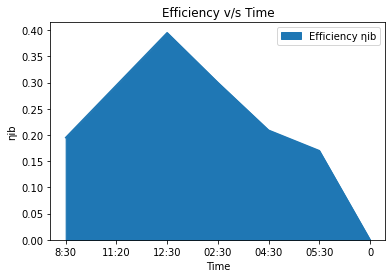

In [52]:
line = df.plot.area(x="Time",title="Efficiency v/s Time")
line.set_ylabel("ƞib")
